EDA de Siniestros viales en CABA

Cargamos librerias a utilizar en nuestro EDA

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

El archivo original es un .xlsx especifico de Excel

Se trabajará con pandas mediante dataframes

In [20]:
# Cargar el archivo .xlsx en un objeto ExcelFile de pandas
excel_file = pd.ExcelFile('homicidios.xlsx')

# Leer la segunda hoja del archivo
df = pd.read_excel

print(excel_file.sheet_names)


['HECHOS', 'DICCIONARIO_HECHOS', 'VICTIMAS', 'DICCIONARIO_VICTIMAS', 'clas']


Al revisar el dataframe de la primera hoja del Excel, nos percatamos de la existencia de varias colummnas del tipo númericas y categoricas, con fechas en varios formatos indicando cuándo sucedio el siniestro. Por otro lado encontramos datos sobre localidades, tanto coordenadas como direcciones, tipos de calles y comunas. Finalmente hay datos sobre los participantes del siniestro, de acusados como victimas, estos indican el tipo de vehiculo o peaton relacionado en los hechos.

In [21]:
# Cargar el archivo .xlsx en un objeto ExcelFile de pandas
excel_file = pd.ExcelFile('homicidios.xlsx')

# Leer la segunda hoja del archivo
df = pd.read_excel(excel_file, sheet_name='HECHOS')

# Mostrar las primeras 5 filas del DataFrame
print(df.head())


          ID  N_VICTIMAS      FECHA  AAAA  MM  DD      HORA HH  \
0  2016-0001           1 2016-01-01  2016   1   1  04:00:00  4   
1  2016-0002           1 2016-01-02  2016   1   2  01:15:00  1   
2  2016-0003           1 2016-01-03  2016   1   3  07:00:00  7   
3  2016-0004           1 2016-01-10  2016   1  10  00:00:00  0   
4  2016-0005           1 2016-01-21  2016   1  21  05:20:00  5   

                             LUGAR_DEL_HECHO TIPO_DE_CALLE  ...  Altura  \
0  AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ       AVENIDA  ...     NaN   
1          AV GRAL PAZ  Y AV DE LOS CORRALES      GRAL PAZ  ...     NaN   
2                         AV ENTRE RIOS 2034       AVENIDA  ...  2034.0   
3      AV LARRAZABAL Y GRAL VILLEGAS CONRADO       AVENIDA  ...     NaN   
4  AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA        AVENIDA  ...     NaN   

                                 Cruce  \
0  FERNANDEZ DE LA CRUZ, F., GRAL. AV.   
1                  DE LOS CORRALES AV.   
2                         

En la segunda hoja del archivo encontramos información respecto a las Victimas (muertes), con fechas del siniestro en variedad de temporalidades y fechas del fallecimiento de las victimas, además del rol de la victima en los hechos, pudiendo ser conductor, peaton, entre otros.

In [22]:
# Cargar el archivo .xlsx en un objeto ExcelFile de pandas
excel_file = pd.ExcelFile('homicidios.xlsx')

# Leer la segunda hoja del archivo
df2 = pd.read_excel(excel_file, sheet_name='VICTIMAS')

# Mostrar las primeras 5 filas del DataFrame
print(df2.head(10))


    ID_hecho      FECHA  AAAA  MM  DD                   ROL VICTIMA  \
0  2016-0001 2016-01-01  2016   1   1             CONDUCTOR    MOTO   
1  2016-0002 2016-01-02  2016   1   2             CONDUCTOR    AUTO   
2  2016-0003 2016-01-03  2016   1   3             CONDUCTOR    MOTO   
3  2016-0004 2016-01-10  2016   1  10             CONDUCTOR    MOTO   
4  2016-0005 2016-01-21  2016   1  21             CONDUCTOR    MOTO   
5  2016-0008 2016-01-24  2016   1  24             CONDUCTOR    MOTO   
6  2016-0009 2016-01-24  2016   1  24  PASAJERO_ACOMPAÑANTE    MOTO   
7  2016-0010 2016-01-29  2016   1  29             CONDUCTOR    MOTO   
8  2016-0012 2016-02-08  2016   2   8             CONDUCTOR    MOTO   
9  2016-0013 2016-02-10  2016   2  10                PEATON  PEATON   

        SEXO EDAD  FECHA_FALLECIMIENTO  
0  MASCULINO   19  2016-01-01 00:00:00  
1  MASCULINO   70  2016-01-02 00:00:00  
2  MASCULINO   30  2016-01-03 00:00:00  
3  MASCULINO   18                   SD  
4  MASCULINO 

In [23]:
# Cargar el conjunto de datos en un DataFrame de pandas
df 

# Verificar valores nulos
print('Valores nulos por columna:')
print(df.isnull().sum())

# Verificar valores duplicados
print('Valores duplicados:')
print(df.duplicated().sum())

# Verificar valores únicos
print('Valores únicos por columna:')
for col in df.columns:
    print(f'{col}: {df[col].nunique()}')

# Ver información sobre el DataFrame
print('Información sobre el DataFrame:')
print(df.info())

# Ver estadísticas descriptivas del DataFrame
print('Estadísticas descriptivas del DataFrame:')
print(df.describe())


Valores nulos por columna:
ID                         0
N_VICTIMAS                 0
FECHA                      0
AAAA                       0
MM                         0
DD                         0
HORA                       0
HH                         0
LUGAR_DEL_HECHO            0
TIPO_DE_CALLE              0
Calle                      1
Altura                   567
Cruce                    171
Dirección Normalizada      8
COMUNA                     0
XY (CABA)                  0
pos x                      0
pos y                      0
PARTICIPANTES              0
VICTIMA                    0
ACUSADO                    0
dtype: int64
Valores duplicados:
0
Valores únicos por columna:
ID: 696
N_VICTIMAS: 3
FECHA: 598
AAAA: 6
MM: 12
DD: 31
HORA: 375
HH: 25
LUGAR_DEL_HECHO: 683
TIPO_DE_CALLE: 4
Calle: 279
Altura: 126
Cruce: 317
Dirección Normalizada: 635
COMUNA: 16
XY (CABA): 606
pos x: 605
pos y: 605
PARTICIPANTES: 41
VICTIMA: 10
ACUSADO: 10
Información sobre el DataFrame:
<class '

En cuanto a los valores outliers, estos serán tomados en cuenta ya que dan consistencia a los datos sin perder calidad en los mismos.

Los valores SD (sin datos) serán eliminados a excepción de algunos que tengan a lo menos una relación con datos ejemplo "Peaton-SD".

Siniestros viales por fecha, agrupados por diferentes enfoques temporales

- Año
- Mes
- Día
- Hora
- Temporada (verano, invierno, otoño, primavera)

In [24]:
# Elimina las filas que contienen 'sd' en cualquier columna
df = df[(df != 'SD').all(axis=1)]

# Agrupar por año
df_por_año = df.groupby(df['FECHA'].dt.year).size()

# Agrupar por mes
df_por_mes = df.groupby(df['FECHA'].dt.month).size()

# Agrupar por día
df_por_dia = df.groupby(df['FECHA'].dt.day).size()

# Agrupar por hora y calcular el tamaño
df_por_hora = df.groupby('HH').size()


# Mapeo de meses a estaciones
mapeo_estaciones = {
    1: 'verano', 2: 'verano', 12: 'verano',
    3: 'otoño', 4: 'otoño', 5: 'otoño',
    6: 'invierno', 7: 'invierno', 8: 'invierno',
    9: 'primavera', 10: 'primavera', 11: 'primavera'
}

# Aplica el mapeo al DataFrame
df['temporada'] = df['FECHA'].dt.month.map(mapeo_estaciones)

# Agrupa por temporada
df_por_temporada = df.groupby('temporada').size()



El conjunto de datos abarca un período de seis años, desde 2016 hasta 2021. Al examinar el gráfico, se observa una disminución significativa en los incidentes durante los últimos tres años. Esta tendencia a la baja podría estar correlacionada con las medidas de cuarentena implementadas en diversas regiones del país en respuesta a la pandemia de COVID-19.

Además, es importante considerar que esta disminución también podría ser un indicativo de la efectividad de las leyes implementadas durante este período. Sin embargo, sin un análisis más detallado, no podemos descartar ni confirmar definitivamente esta hipótesis.

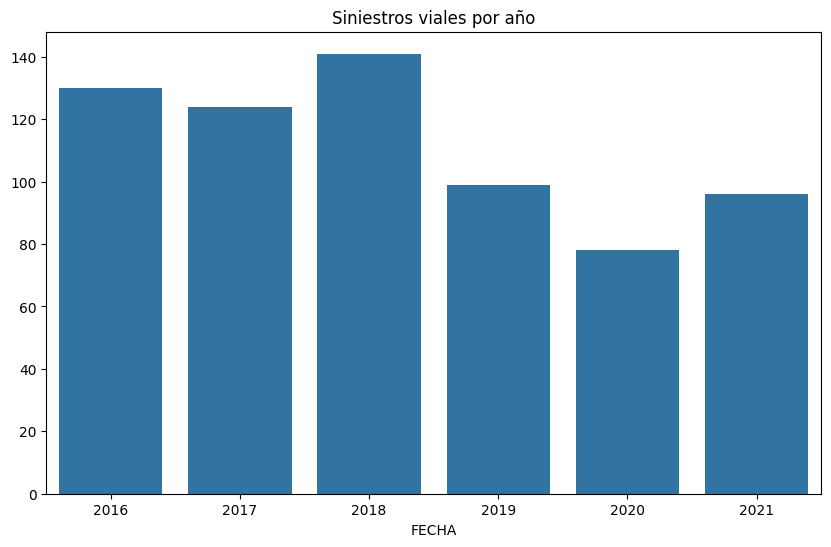

In [25]:
# Agrupar por año y calcular el tamaño
df_por_año = df.groupby(df['FECHA'].dt.year).size()
plt.figure(figsize=(10,6))
sns.barplot(x=df_por_año.index, y=df_por_año.values)
plt.title('Siniestros viales por año')
plt.show()

El gráfico de barras que presentamos a continuación revela una tendencia interesante: se observa un incremento en los siniestros viales hacia el final del año, seguido de una disminución significativa al comienzo del año siguiente.

Este patrón puede estar influenciado por varios factores. Uno de ellos son las celebraciones de fin de año, que pueden llevar a un aumento en los desplazamientos y, por ende, en los incidentes viales. Además, el inicio de las vacaciones, tanto para estudiantes como para trabajadores, podría ser otro factor contribuyente. En diciembre, muchas familias e individuos se trasladan a sus destinos vacacionales, lo que podría explicar el pico en los siniestros viales durante este período.

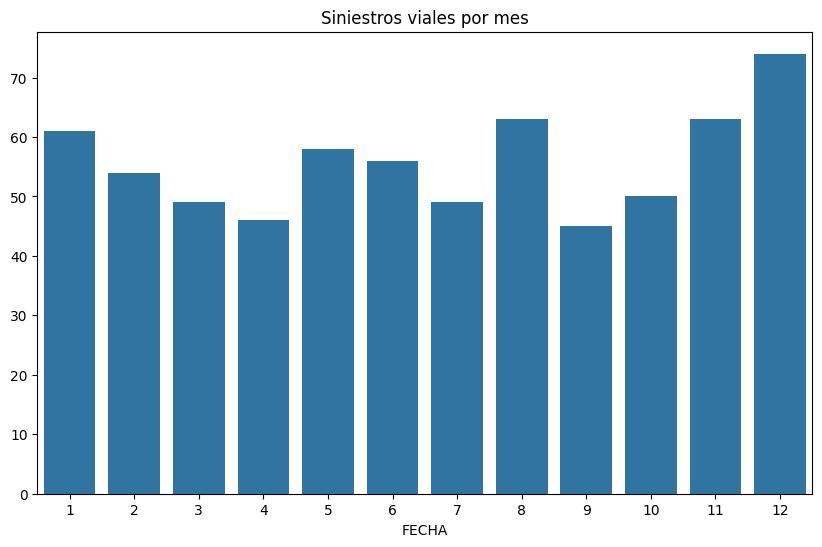

In [26]:
# Agrupar por mes y calcular el tamaño
df_por_mes = df.groupby(df['FECHA'].dt.month).size()
plt.figure(figsize=(10,6))
sns.barplot(x=df_por_mes.index, y=df_por_mes.values)
plt.title('Siniestros viales por mes')
plt.show()

Nuestro análisis revela que los accidentes viales son más comunes durante las horas de la mañana, alcanzando su pico entre las 5 a.m. y las 6 a.m.

En contraste, a las 2 a.m., los incidentes viales disminuyen notablemente. Esta disminución probablemente se deba a que la mayoría de las personas están durmiendo a esta hora, lo que resulta en un menor movimiento de personas en las calles.

Además, observamos una disminución en los accidentes viales alrededor de las 13 hrs, coincidiendo con la hora del almuerzo. Este fenómeno podría estar relacionado con el hecho de que hay menos personas en movimiento durante este período. Sin embargo, es interesante notar que los incidentes viales aumentan significativamente justo antes y después de esta hora. Esto podría sugerir que las personas se desplazan a otros lugares para almorzar y luego regresan a su lugar de trabajo, lo que podría contribuir al aumento de los siniestros viales durante estos períodos.

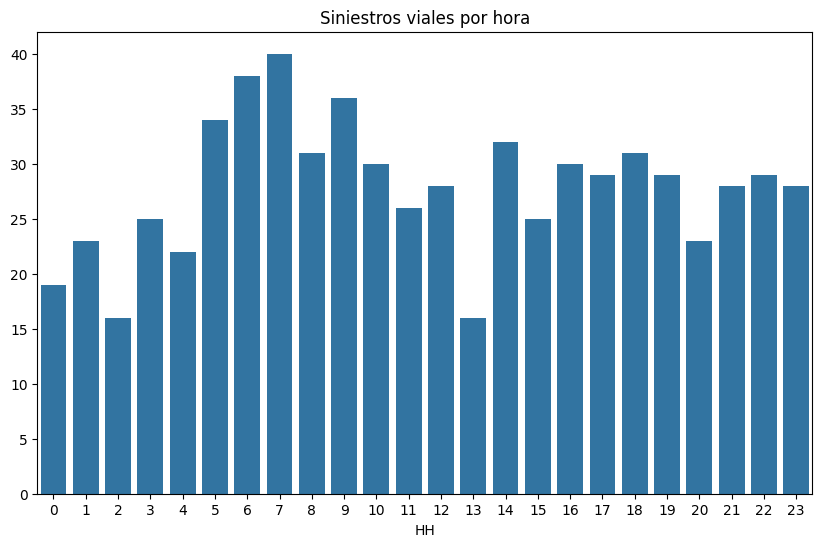

In [27]:
# Agrupar por hora y calcular el tamaño
df_por_hora = df.groupby('HH').size()

# Generar un gráfico de barras
plt.figure(figsize=(10,6))
sns.barplot(x=df_por_hora.index, y=df_por_hora.values)
plt.title('Siniestros viales por hora')
plt.show()

Nuestro análisis basado en gráficas de las estaciones del año revela un patrón interesante. Durante la temporada de verano y específicamente en el mes de diciembre, se observa un pico notable en los siniestros viales.

Por otro lado, en otoño se registran los valores mínimos de incidentes viales. Sin embargo, es importante destacar que la diferencia no es significativa en comparación con otras estaciones como invierno o primavera.

Estos hallazgos sugieren que las condiciones climáticas y los patrones de comportamiento asociados con las diferentes estaciones del año podrían tener un impacto en la frecuencia de los siniestros viales.

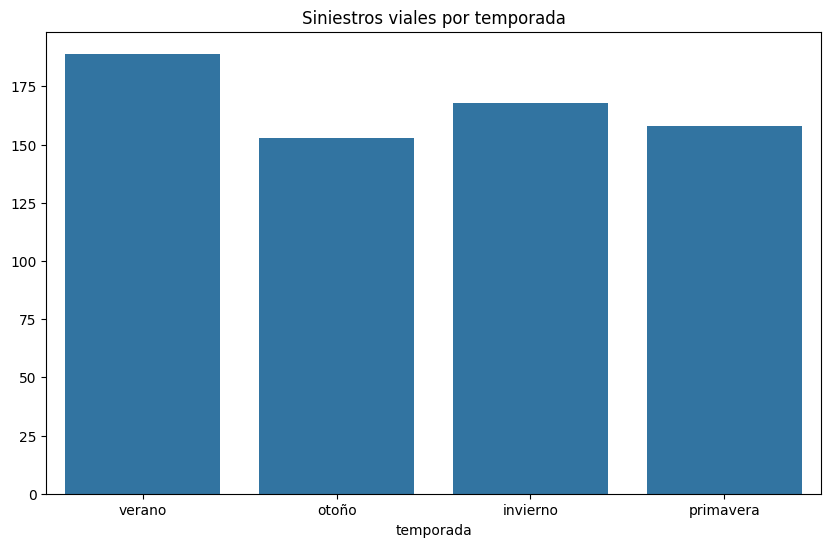

In [28]:
# Aplica el mapeo al DataFrame
df['temporada'] = df['FECHA'].dt.month.map(mapeo_estaciones)

# Agrupa por temporada
df_por_temporada = df.groupby('temporada').size()

# Define el orden de las estaciones
orden_estaciones = ['verano', 'otoño', 'invierno', 'primavera']

# Reordena el DataFrame de acuerdo al orden de las estaciones
df_por_temporada = df_por_temporada.loc[orden_estaciones]

# Ahora puedes graficar tus datos
plt.figure(figsize=(10,6))
sns.barplot(x=df_por_temporada.index, y=df_por_temporada.values)
plt.title('Siniestros viales por temporada')
plt.show()



Siestros viales según localidad (calle, dirección, coordenadas...), tambien según el tipo de calle (Avenida, Calle, Autopista o Gral Paz), tambien por comuna.

Al clasificar las comunas según la cantidad de siniestros viales, observamos que, aunque todas las comunas están afectadas en cierta medida, hay cinco comunas específicas (1, 4, 9, 8 y 7) que destacan por tener un número significativamente mayor de accidentes viales en comparación con el resto.

Es importante señalar que, debido a la falta de información específica sobre los nombres de estas comunas, no podemos determinar con precisión sus dimensiones o la cantidad de personas que viven en ellas. Es importante tener en cuenta esta limitación al interpretar los resultados de nuestro Análisis Exploratorio de Datos (EDA).

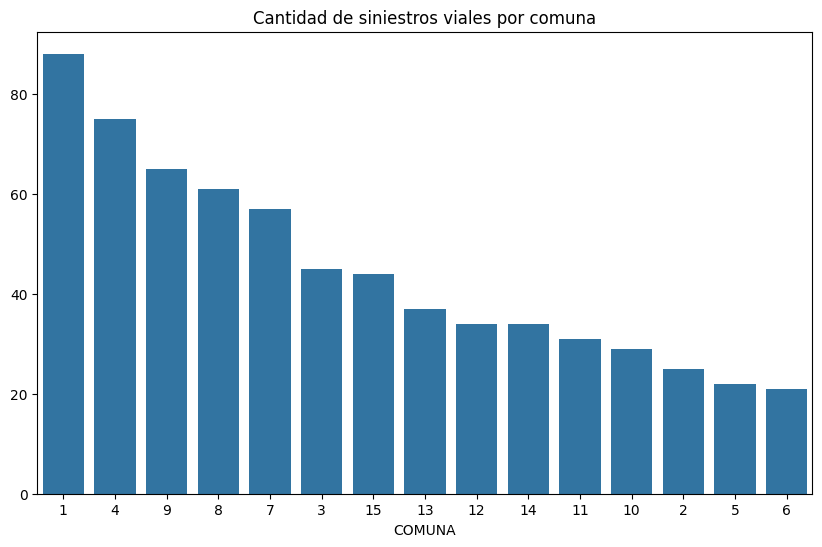

In [29]:
# Agrupa por comuna y ordena los valores de mayor a menor
df_por_comuna = df.groupby('COMUNA').size().sort_values(ascending=False)

# Ahora puedes graficar tus datos
plt.figure(figsize=(10,6))
sns.barplot(x=df_por_comuna.index, y=df_por_comuna.values, order=df_por_comuna.index)
plt.title('Cantidad de siniestros viales por comuna')
plt.show()



Al analizar la distribución de siniestros viales a lo largo del día por comuna, se observa claramente que los valores se concentran en el rango central de las horas del día. En particular, podemos destacar que a las 11 y 12 del día se registran accidentes en todas las comunas.

Además, es importante señalar que se identifican valores extremos o “outliers” distribuidos de manera uniforme a lo largo de todas las horas del día. Esto sugiere que todas las comunas experimentan accidentes viales durante prácticamente las 24 horas del día. Sin embargo, la comuna 5 es una excepción notable, ya que solo registra accidentes a partir de las 5 a.m.

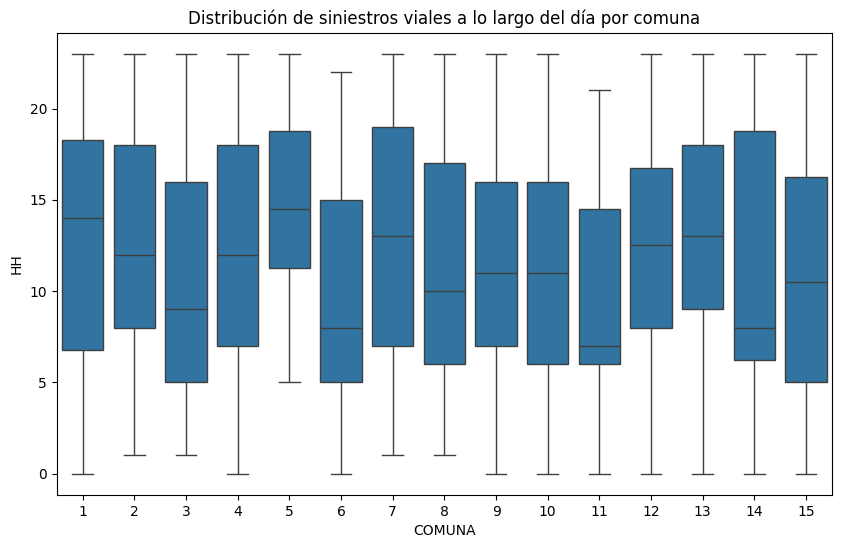

In [30]:
plt.figure(figsize=(10,6))
sns.boxplot(x='COMUNA', y='HH', data=df)
plt.title('Distribución de siniestros viales a lo largo del día por comuna')
plt.show()


Al analizar el mapa de calor de los siniestros viales por comuna, se observa claramente que las comunas 1 y 4 presentan una mayor concentración de “puntos calientes”. Esto indica un mayor número de accidentes viales en estas áreas.

Aunque también se observan intensidades de calor significativas en las comunas 7, 8 y 9, estas no son tan consistentes como en las comunas 1 y 4.

Además, al correlacionar estos hallazgos con los gráficos analizados anteriormente, notamos una consistencia en los accidentes viales durante los meses 1 y 12. Estos meses presentan “puntos calientes” con intensidades de color cercanas al rojo intenso en el mapa de calor, lo que indica un alto número de accidentes viales.

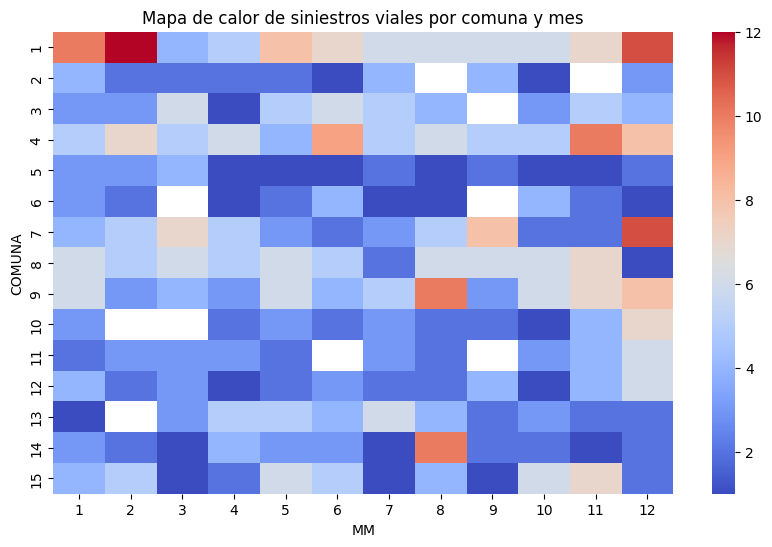

In [31]:
df_heatmap = df.groupby(['COMUNA', 'MM']).size().unstack()

plt.figure(figsize=(10,6))
sns.heatmap(df_heatmap, cmap='coolwarm')
plt.title('Mapa de calor de siniestros viales por comuna y mes')
plt.show()


Al filtrar los datos según el tipo de calle, observamos en el gráfico que el valor “AVENIDA” aparece con mucha más frecuencia en la base de datos que “CALLE”, “AUTOPISTA” o “GRAL PAZ”. A primera vista, uno podría suponer que, debido al alto flujo de vehículos, los siniestros viales en las autopistas serían igual o mayor que en las avenidas. Sin embargo, este no es el caso: el número de siniestros viales en las avenidas supera al menos cinco veces al de las autopistas.

Este fenómeno puede deberse a la gran cantidad de personas que circulan por las avenidas, donde existen semáforos, pasos de cebra y otras señales de tráfico que indican la presencia y movilización de personas. A menudo, es en estos puntos donde ocurren los accidentes entre vehículos y peatones, ya que son puntos de encuentro no necesariamente intencionados.


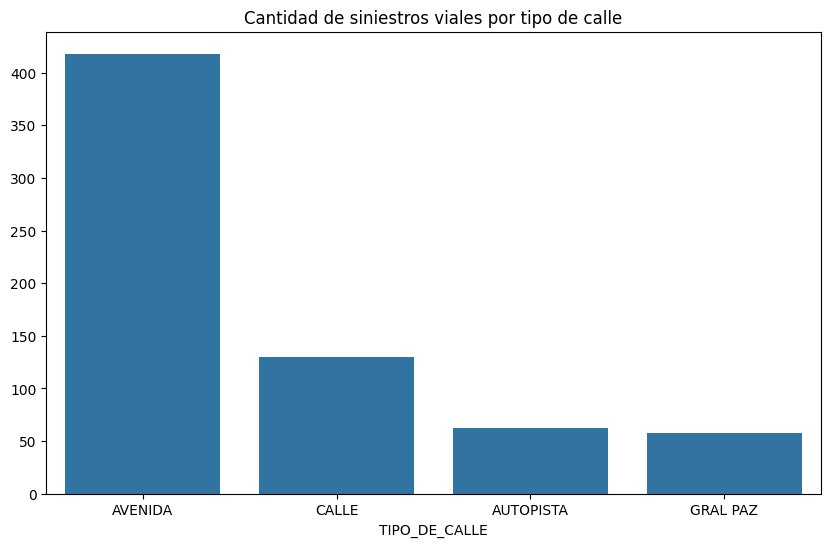

In [32]:
df_por_tipo_calle = df['TIPO_DE_CALLE'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=df_por_tipo_calle.index, y=df_por_tipo_calle.values)
plt.title('Cantidad de siniestros viales por tipo de calle')
plt.show()


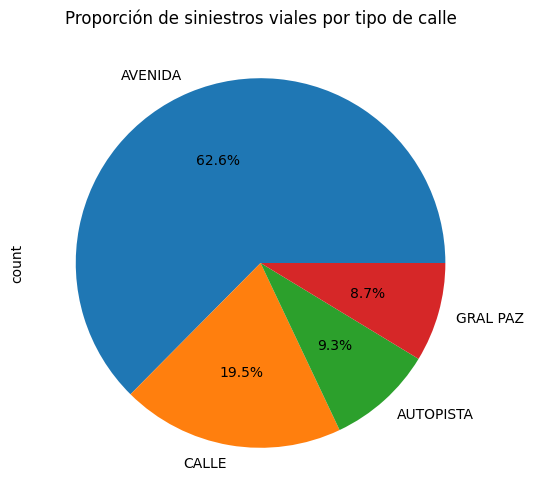

In [33]:
plt.figure(figsize=(10,6))
df['TIPO_DE_CALLE'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proporción de siniestros viales por tipo de calle')
plt.show()


Siniestros viales según el causante o acusado del siniestro y según la victima, los datos se encuentran como texto:

- Moto, Auto, Peaton, Carga, Pasajeros...

En nuestro análisis, identificamos que los vehículos categorizados como “Autos”, “Pasajeros” y “Carga” son los principales causantes de accidentes viales con consecuencias mortales.

El término “Pasajeros” se refiere a vehículos que transportan personas, como los autobuses urbanos. Por otro lado, “Carga” se refiere a vehículos que transportan algún tipo de carga, como los camiones tolva que transportan tierra, escombros u otros elementos.

Además, el término “Objeto fijo” se refiere a cualquier elemento estático en la calle o vías de tránsito con el que un vehículo ha colisionado. Esto también puede incluir situaciones en las que un árbol caído ha causado la muerte de personas.

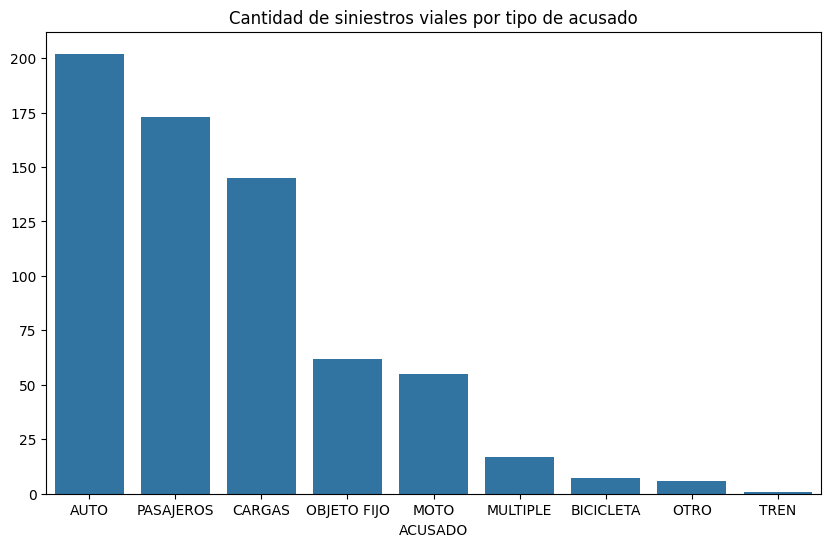

In [34]:
df_por_acusado = df['ACUSADO'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=df_por_acusado.index, y=df_por_acusado.values)
plt.title('Cantidad de siniestros viales por tipo de acusado')
plt.show()


Tanto las motos como los peatones son las categorías más afectadas por accidentes viales, con una pequeña diferencia entre ambas. Esto concuerda con el hecho de que son las víctimas más expuestas al contacto directo con el exterior en caso de una colisión o atropello.

En tercer lugar, encontramos a los autos, que registran un número de accidentes considerablemente menor en comparación con las dos primeras categorías. En cuarto lugar, están las bicicletas, siguiendo la tendencia de estar expuestas directamente al exterior en caso de un accidente.

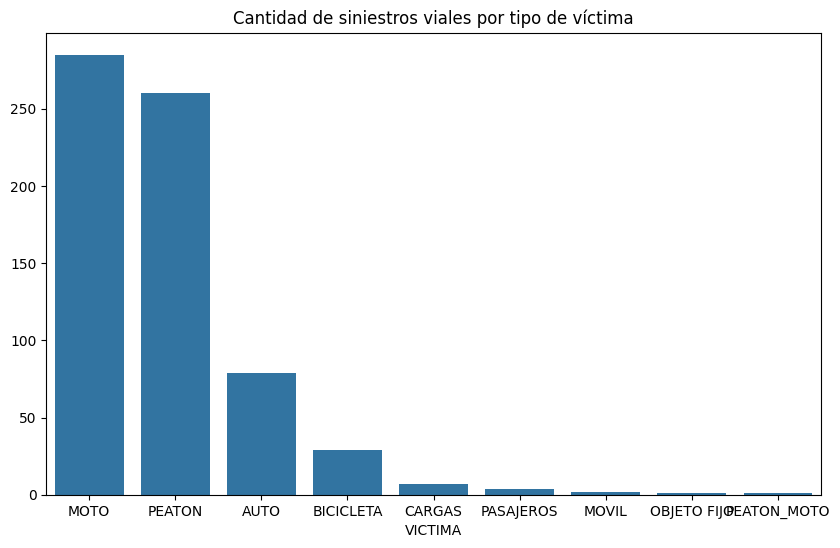

In [35]:
df_por_victima = df['VICTIMA'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=df_por_victima.index, y=df_por_victima.values)
plt.title('Cantidad de siniestros viales por tipo de víctima')
plt.show()



Como hemos observado anteriormente, se repite el patrón de las motos y los peatones como las principales víctimas en los accidentes viales. Este hallazgo se ve reforzado por las comunas 1, 4, 7 y 8, que también muestran altas concentraciones de accidentes en el mapa de calor.

Estos resultados subrayan la necesidad de implementar medidas de seguridad vial más efectivas, especialmente en estas comunas y para estos grupos de usuarios de la vía, para reducir la incidencia de accidentes viales.

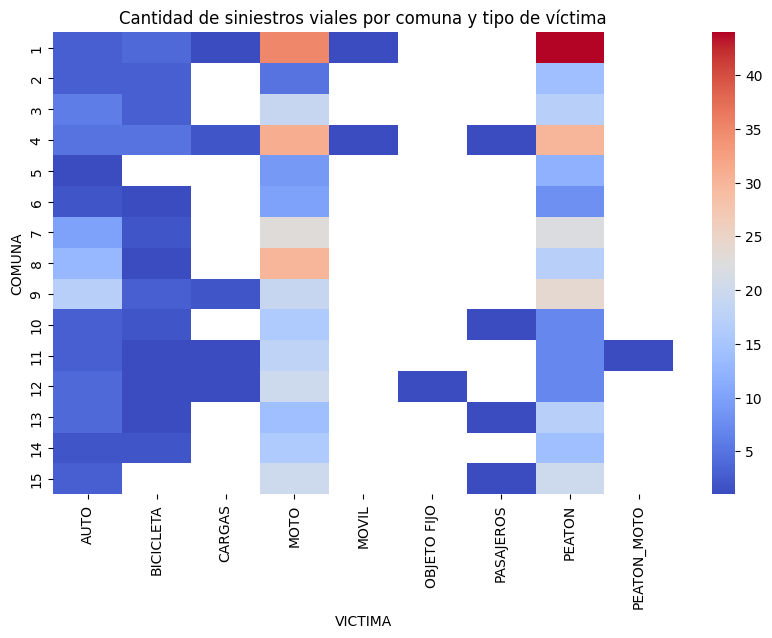

In [36]:
df_heatmap = df.groupby(['COMUNA', 'VICTIMA']).size().unstack()

plt.figure(figsize=(10,6))
sns.heatmap(df_heatmap, cmap='coolwarm')
plt.title('Cantidad de siniestros viales por comuna y tipo de víctima')
plt.show()


A lo largo de nuestro Análisis Exploratorio de Datos (EDA), hemos identificado varias tendencias y patrones clave en los datos de siniestros viales.

Primero, observamos que los accidentes viales son más comunes durante ciertos períodos del día, con un pico notable en las primeras horas de la mañana. Además, hay una correlación aparente entre los accidentes viales y las estaciones del año, con un aumento en los accidentes durante el verano y diciembre.

En términos de ubicación, las comunas 1 y 4 presentan una mayor concentración de accidentes viales. Sin embargo, todas las comunas experimentan accidentes viales durante prácticamente las 24 horas del día, con la excepción notable de la comuna 5.

Al analizar los accidentes por tipo de vehículo, encontramos que los vehículos categorizados como “Autos”, “Pasajeros” y “Carga” son los principales causantes de accidentes viales con consecuencias mortales. Además, las motos y los peatones son las categorías más afectadas por accidentes viales.

Finalmente, al examinar los accidentes por tipo de calle, descubrimos que los accidentes son más comunes en las avenidas que en las autopistas, a pesar del alto flujo de vehículos en estas últimas.

Estos hallazgos subrayan la necesidad de implementar medidas de seguridad vial más efectivas para reducir la incidencia de accidentes viales. Específicamente, las intervenciones deben centrarse en mejorar la seguridad de los usuarios de la vía más vulnerables, como los peatones y los motociclistas, y en las áreas con una alta concentración de accidentes.